In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from domino.vis.generate import generate_results

task: generate_results, run_id=171743


  0%|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | 0/8 [00:00<?, ?it/s]

task: sdm_barplot, run_id=171744
task: sdm_displot, run_id=171747


 12%|████████████████████████████████████████████████████████████████                                                                                                                                                                                                                                                                                                                                                                                                                                                                | 1/8 [00:05<00:41,  5.91s/it]

task: sdm_barplot, run_id=171748
task: sdm_displot, run_id=171750


 25%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                                                                                                                                                                                                                | 2/8 [00:11<00:34,  5.68s/it]

task: sdm_barplot, run_id=171752
task: sdm_displot, run_id=171754


 38%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                                                                                                                                                | 3/8 [00:14<00:24,  4.92s/it]

task: sdm_barplot, run_id=171755
task: sdm_displot, run_id=171757


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                                                                                | 4/8 [00:18<00:18,  4.73s/it]

task: sdm_barplot, run_id=171758
task: sdm_displot, run_id=171763


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                | 5/8 [00:26<00:16,  5.63s/it]

task: sdm_barplot, run_id=171769
task: sdm_displot, run_id=171772


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                | 6/8 [00:33<00:12,  6.18s/it]

task: sdm_barplot, run_id=171775
task: sdm_displot, run_id=171777


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 7/8 [00:36<00:05,  5.25s/it]

task: sdm_barplot, run_id=171780
task: sdm_displot, run_id=171782


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:39<00:00,  4.96s/it]


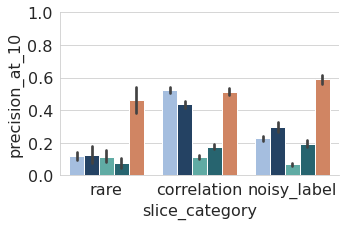

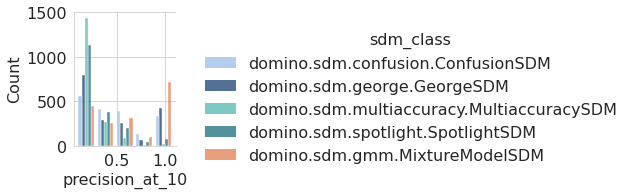

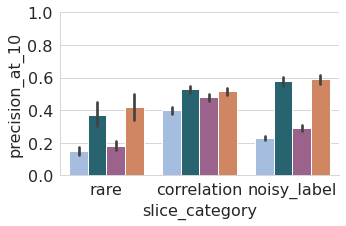

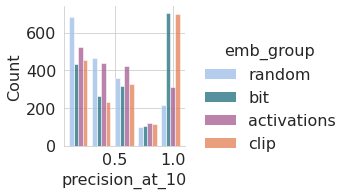

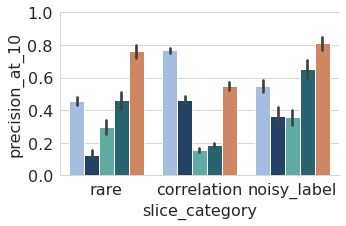

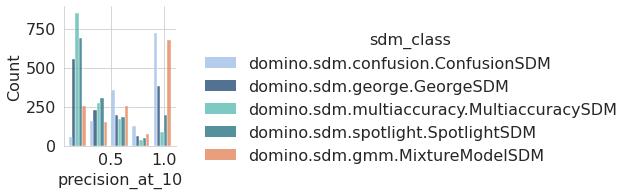

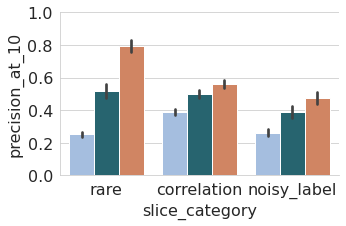

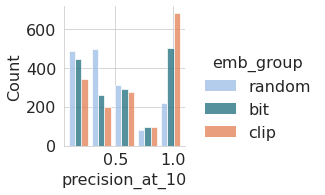

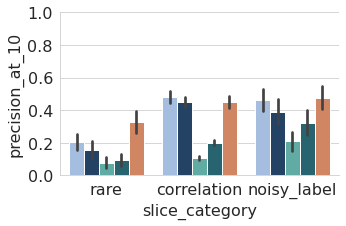

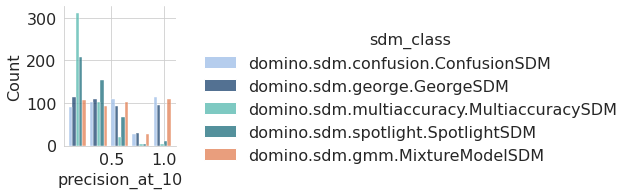

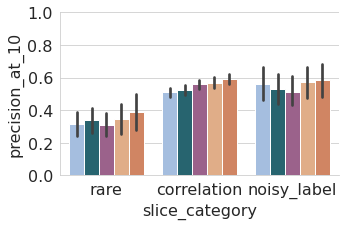

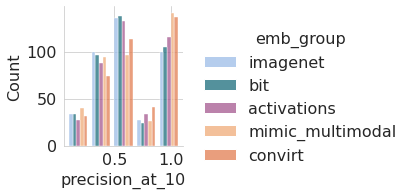

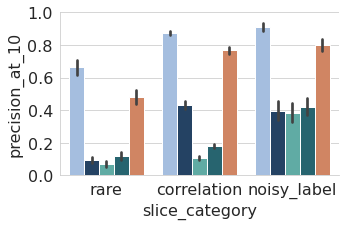

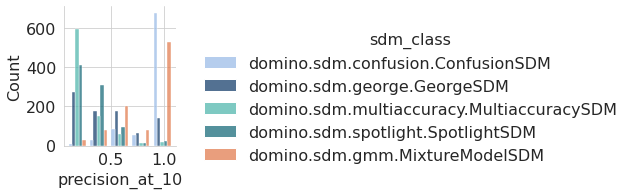

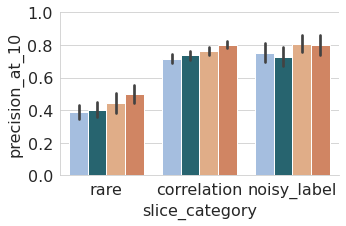

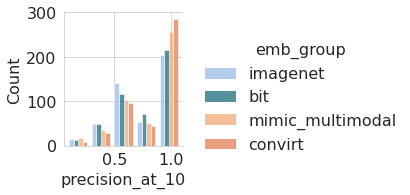

In [7]:
results = generate_results(skip_terra_cache=True)

In [2]:
import os
import terra
import meerkat as mk
from domino.data.visual_genome import read_vg, ATTRIBUTE_GROUPS
import numpy as np
import pandas as pd
from rich import print
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from domino.evaluate import run_sdms, run_sdm, score_sdm_explanations, score_sdms
from domino.train import score_model
import meerkat.contrib.mimic.gcs

from domino.plot import PALETTE, coherence_metric, EMB_PALETTE, generate_group_df
sys.path.insert(1,'/pd/maya/domino/domino')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/sabri/code/meerkat/meerkat/nn/__init__.py:7: ExperimentalWarning: The `meerkat.nn` module is experimental and has limited test coverage. Proceed with caution.
  warnings.warn(


In [10]:
run_ids = {
    "method": {
        "natural": {
            "synthetic":[90363, 94854],
            "real": [102466, 142612]
        },
        "mimic":{
            "synthetic":[],
            "real": []
        },
        "eeg":{
            "synthetic":[],
            "real": []
        }
    },
    "embed": {
        "natural": {
            "synthetic":[82222, 77006, 87801, 89044],
            "real": [136271, 99336, 99862]
        },
        "mimic":{
            "synthetic":[],
            "real": []
        },
        "eeg":{
            "synthetic":[],
            "real": []
        }
    }
}

In [49]:
import pandas as pd
from domino.plot import generate_group_df


df = pd.concat(
    [generate_group_df(score_sdms_id=run_id) for run_id in [*real_embed_natural, *synthetic_embed_natural]]
)
df["success"] = df["precision_at_10"] > 0.8
df.groupby("emb_group")["success"].mean()


df = pd.concat(
    [generate_group_df(score_sdms_id=run_id) for run_id in [*real_method_natural, *synthetic_method_natural]]
)
df["success"] = df["precision_at_10"] > 0.8
df.groupby("sdm_class")["success"].mean()

sdm_class
domino.sdm.confusion.ConfusionSDM            0.230104
domino.sdm.george.GeorgeSDM                  0.194348
domino.sdm.gmm.MixtureModelSDM               0.354960
domino.sdm.multiaccuracy.MultiaccuracySDM    0.021062
domino.sdm.spotlight.SpotlightSDM            0.059435
Name: success, dtype: float64

In [53]:
df[df["slice_category"] == "rare"].groupby("sdm_class")["success"].mean()

sdm_class
domino.sdm.confusion.ConfusionSDM            0.002778
domino.sdm.george.GeorgeSDM                  0.036111
domino.sdm.gmm.MixtureModelSDM               0.394444
domino.sdm.multiaccuracy.MultiaccuracySDM    0.052778
domino.sdm.spotlight.SpotlightSDM            0.119444
Name: success, dtype: float64

# `model=real_comparison=embed_data=natural`


In [39]:
df = terra.out(terra.inp(136271)["setting_dp"].run_id).load().to_pandas()
df.groupby("slice_category")["setting_id"].nunique()

slice_category
noisy_label    353
rare           301
Name: setting_id, dtype: int64

task: sdm_barplot, run_id=157870
slice_category
correlation    520
noisy_label    287
rare           177
Name: setting_id, dtype: int64
slice_category
correlation    4
noisy_label    4
rare           4
Name: alpha, dtype: int64


<Figure size 432x288 with 0 Axes>

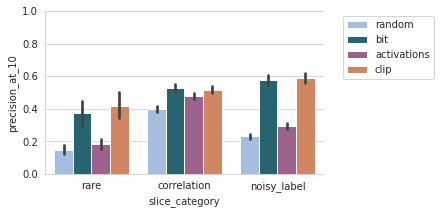

In [13]:

# real model embed comparison natural images 
from domino.plot import sdm_barplot
# 96545
out = sdm_barplot(
    score_sdm_ids=[136271, 99336, 99862],
    emb_groups=["bit", "clip", "random", "activations"],
    sdm_classes=["domino.sdm.gmm.MixtureModelSDM"],
    skip_terra_cache=True,
    hue="emb_group",
    degraded_threshold=0.1
)


task: sdm_displot, run_id=157871
slice_category
correlation    520
noisy_label    287
rare           177
Name: setting_id, dtype: int64


<Figure size 432x288 with 0 Axes>

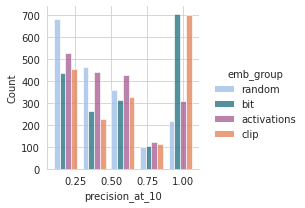

In [14]:

# real model embed comparison natural images 
from domino.plot import sdm_displot
out = sdm_displot(
    score_sdm_ids=[136271, 99336, 99862],
    emb_groups=["bit", "clip", "random", "activations"],
    sdm_classes=["domino.sdm.gmm.MixtureModelSDM"],
    skip_terra_cache=True,
    hue="emb_group",
    degraded_threshold=0.1
)


# `model=real_comparison=method_data=natural`

task: sdm_barplot, run_id=157794
slice_category
correlation    520
noisy_label    288
rare           163
Name: setting_id, dtype: int64
slice_category
correlation    4
noisy_label    4
rare           4
Name: alpha, dtype: int64


<Figure size 432x288 with 0 Axes>

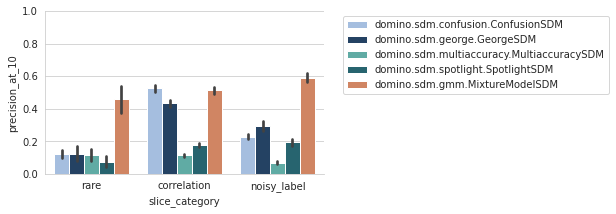

In [9]:
# model=real, comparison=method, data=natural 

from domino.plot import sdm_barplot
#95934,
out = sdm_barplot(
    score_sdm_ids=[102466, 142612],
    emb_groups=["clip"],

    sdm_classes=[
        "domino.sdm.gmm.MixtureModelSDM",
        "domino.sdm.george.GeorgeSDM",
        "domino.sdm.multiaccuracy.MultiaccuracySDM",
        "domino.sdm.spotlight.SpotlightSDM",
        "domino.sdm.confusion.ConfusionSDM",
    ],
    skip_terra_cache=True,
    degraded_threshold=0.1,
    hue="sdm_class"
)


task: sdm_displot, run_id=157820
slice_category
correlation    520
noisy_label    353
rare           240
Name: setting_id, dtype: int64


<Figure size 432x288 with 0 Axes>

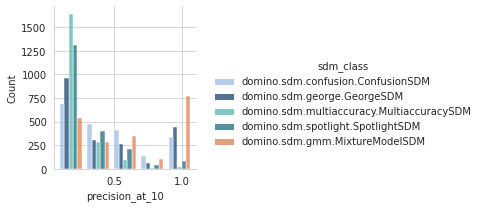

In [12]:
# model=real, comparison=method, data=natural 

from domino.plot import sdm_displot

out = sdm_displot(
    score_sdm_ids=[102466, 142612],
    emb_groups=["clip"],

    sdm_classes=[
        "domino.sdm.gmm.MixtureModelSDM",
        "domino.sdm.george.GeorgeSDM",
        "domino.sdm.multiaccuracy.MultiaccuracySDM",
        "domino.sdm.spotlight.SpotlightSDM",
        "domino.sdm.confusion.ConfusionSDM",
    ],
    skip_terra_cache=True,
    hue="sdm_class"
)


# `model=synthetic, comparison=embed, data=natural`

In [38]:
terra.inp(82222)["setting_dp"]
df = terra.out(81039).load().to_pandas()
df.groupby("slice_category")["setting_id"].nunique()

slice_category
rare    394
Name: setting_id, dtype: int64

task: sdm_barplot, run_id=141268
slice_category
correlation    520
noisy_label     95
rare           197
Name: setting_id, dtype: int64
slice_category
correlation    4
noisy_label    1
rare           1
Name: alpha, dtype: int64


<Figure size 432x288 with 0 Axes>

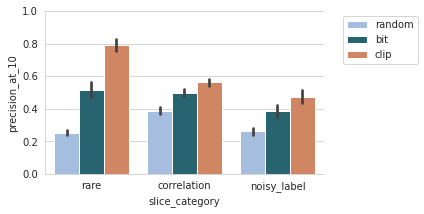

In [49]:
from domino.plot import sdm_barplot
sdm_barplot(
    score_sdm_ids=[82222, 77006, 87801, 89044],
    emb_groups=["bit", "clip", "random"],
    sdm_classes=["domino.sdm.gmm.MixtureModelSDM"],
    skip_terra_cache=True
)

task: sdm_displot, run_id=138875


<Figure size 432x288 with 0 Axes>

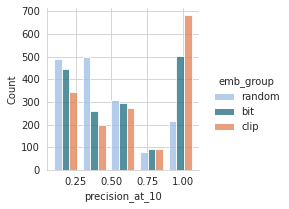

In [27]:
from domino.plot import sdm_displot
sdm_displot(
    score_sdm_ids=[82222, 77006, 87801, 89044],
    emb_groups=["bit", "clip", "random"],
    sdm_classes=["domino.sdm.gmm.MixtureModelSDM"],
)

# `model=synthetic_comparison=method_data=natural`

task: sdm_barplot, run_id=157927
slice_category
correlation    520
noisy_label    192
rare           195
Name: setting_id, dtype: int64
slice_category
correlation    4
noisy_label    1
rare           1
Name: alpha, dtype: int64


<Figure size 432x288 with 0 Axes>

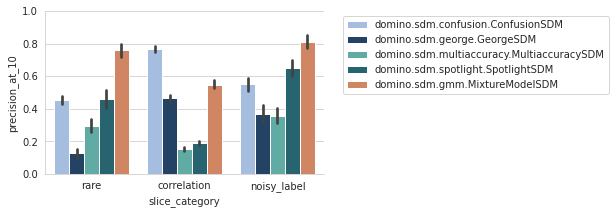

In [15]:
# model=synthetic_comparison=method_data=natural 
from domino.plot import sdm_barplot

out = sdm_barplot(
    score_sdm_ids=[90363, 94854],
    emb_groups=["clip"],

    sdm_classes=[
        "domino.sdm.gmm.MixtureModelSDM",
        "domino.sdm.george.GeorgeSDM",
        "domino.sdm.multiaccuracy.MultiaccuracySDM",
        "domino.sdm.spotlight.SpotlightSDM",
        "domino.sdm.confusion.ConfusionSDM",
    ],
    skip_terra_cache=True,
    hue="sdm_class"
)


task: sdm_displot, run_id=157928
slice_category
correlation    520
noisy_label    192
rare           195
Name: setting_id, dtype: int64


<Figure size 432x288 with 0 Axes>

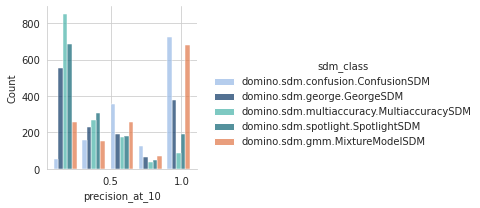

In [16]:
from domino.plot import sdm_displot

out = sdm_displot(
    score_sdm_ids=[90363, 94854],
    emb_groups=["clip"], 
    sdm_classes=[
        "domino.sdm.gmm.MixtureModelSDM",
        "domino.sdm.george.GeorgeSDM",
        "domino.sdm.multiaccuracy.MultiaccuracySDM",
        "domino.sdm.spotlight.SpotlightSDM",
        "domino.sdm.confusion.ConfusionSDM",
    ],
    skip_terra_cache=True,
    hue="sdm_class"
)


### Plots: Section 5.2 - Embeddings

[2021-10-02 07:16:25,327][WARNING][pip._internal.metadata.base:105] :: Ignoring invalid distribution -ay (/pd/common/envs/conda/envs/domino/lib/python3.8/site-packages)


task: sdm_barplot, run_id=89735


/home/sabri/code/domino/domino/plot.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["alpha"] = grouped_df["alpha"].round(3)


<Figure size 432x288 with 0 Axes>

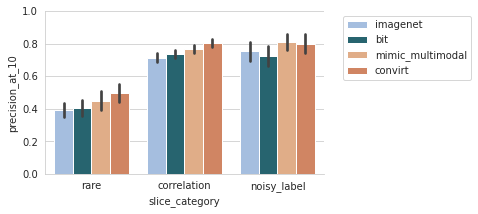

In [6]:
from domino.plot import sdm_barplot
sdm_barplot(
    score_sdm_ids=[45159, 79801, 58676, 77753, 64524, 77296],
    emb_groups=["bit", "imagenet", "mimic_multimodal", "convirt"],
    sdm_classes=["domino.sdm.gmm.MixtureModelSDM"],
    
    skip_terra_cache=True
)

task: sdm_displot, run_id=89782


/home/sabri/code/domino/domino/plot.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["alpha"] = grouped_df["alpha"].round(3)
[2021-10-02 07:20:17,550][WARNING][matplotlib.legend:1225] :: No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

<Figure size 216x216 with 0 Axes>

<Figure size 144x1440 with 0 Axes>

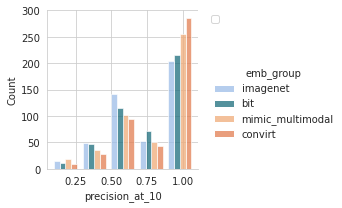

In [9]:
from domino.plot import sdm_displot
sdm_displot(
    score_sdm_ids=[45159, 79801, 58676, 77753, 64524, 77296],
    emb_groups=["bit", "imagenet", "mimic_multimodal", "convirt"],
    sdm_classes=["domino.sdm.gmm.MixtureModelSDM"],
    
    skip_terra_cache=True
)

In [123]:
df_synthetic_rare = generate_group_df(58849, 60240, "rare")
df_synthetic_rare_new = generate_group_df(82396, 83004, "rare")

df = pd.concat([df_synthetic_rare, df_synthetic_rare_new])
df = df[df['emb_type'] != 'mimic_imageonly']
df = df[df['emb_type'] != 'mimic_multimodal_class']
df.head()

/pd/maya/domino/domino/plot.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(slice_type=="correlation"): grouped_df = grouped_df[grouped_df['alpha'] != 0.0]
/pd/maya/domino/domino/plot.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return(grouped_df)
/pd/maya/domino/domino/plot.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,...,target_name,score_model_run_id,slice_name,index,config/sdm,alpha,sdm_class,emb_type,success,slice_type
3038,59489,3,0,0.767429,0.1,0.04,0.01,0.025641,0.025641,0.051282,...,lung_group,58750,atelectasis,3038,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.010,domino.sdm.gmm.MixtureModelSDM,bit,False,rare
3013,59483,3,0,0.636380,0.1,0.04,0.04,0.025641,0.102564,0.153846,...,lung_group,58750,atelectasis,3013,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.010,domino.sdm.gmm.MixtureModelSDM,clip,False,rare
3002,59482,2,0,0.566687,0.1,0.08,0.03,0.076923,0.076923,0.076923,...,lung_group,58750,atelectasis,3002,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.010,domino.sdm.gmm.MixtureModelSDM,imagenet,False,rare
3015,59485,0,0,0.519065,0.0,0.00,0.01,0.000000,0.025641,0.025641,...,lung_group,58750,atelectasis,3015,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.010,domino.sdm.gmm.MixtureModelSDM,mimic_multimodal,False,rare
3186,59520,1,0,0.753583,0.2,0.08,0.03,0.025000,0.037500,0.062500,...,lung_group,58759,atelectasis,3186,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.032,domino.sdm.gmm.MixtureModelSDM,bit,False,rare


# `model=real_comparison=embed_data=mimic`

In [39]:
df = terra.out(terra.inp(136271)["setting_dp"].run_id).load().to_pandas()
df.groupby("slice_category")["setting_id"].nunique()

slice_category
noisy_label    353
rare           301
Name: setting_id, dtype: int64

task: sdm_barplot, run_id=169989
slice_category
correlation    176
noisy_label     30
rare            15
Name: setting_id, dtype: int64
slice_category
correlation    4
noisy_label    5
rare           5
Name: alpha, dtype: int64


<Figure size 432x288 with 0 Axes>

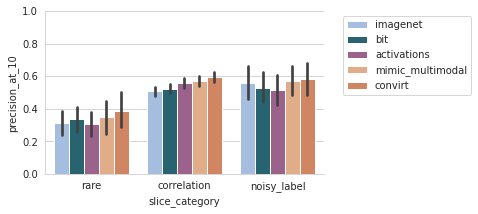

In [46]:

# real model embed comparison natural images 
from domino.plot import sdm_barplot
score_sdm_ids = [110256, 83004, 60240, 168595]
emb_groups = ["bit", "imagenet", "convirt", "mimic_multimodal", "activations"]
out = sdm_barplot(
    score_sdm_ids=score_sdm_ids,
    emb_groups=emb_groups,
    sdm_classes=["domino.sdm.gmm.MixtureModelSDM"],
    skip_terra_cache=True,
    hue="emb_group",
    degraded_threshold=0.1
)


In [32]:
out.load()["emb_group"].unique()

array(['bit', 'convirt', 'imagenet', 'mimic_multimodal'], dtype=object)

task: sdm_displot, run_id=158075
slice_category
correlation    176
rare            55
Name: setting_id, dtype: int64


<Figure size 432x288 with 0 Axes>

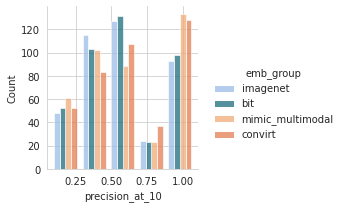

In [26]:

# real model embed comparison natural images 
from domino.plot import sdm_displot
out = sdm_displot(
    score_sdm_ids=score_sdm_ids,
    emb_groups=emb_groups,
    sdm_classes=["domino.sdm.gmm.MixtureModelSDM"],
    skip_terra_cache=True,
    hue="emb_group",
    #degraded_threshold=0.1
)


# `model=real_comparison=method_data=mimic`

task: sdm_barplot, run_id=169061
['convirt' 'mimic_multimodal']
slice_category
correlation    176
rare            15
Name: setting_id, dtype: int64
slice_category
correlation    4
rare           5
Name: alpha, dtype: int64


<Figure size 432x288 with 0 Axes>

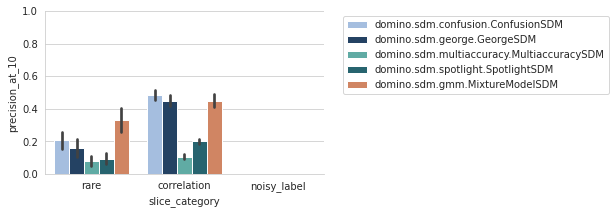

In [28]:
# model=real, comparison=method, data=natural 

from domino.plot import sdm_barplot
score_sdm_ids=[155866, 162811]
out = sdm_barplot(
    score_sdm_ids=score_sdm_ids,
    emb_groups=["convirt", "mimic_multimodal"],

    sdm_classes=[
        "domino.sdm.gmm.MixtureModelSDM",
        "domino.sdm.george.GeorgeSDM",
        "domino.sdm.multiaccuracy.MultiaccuracySDM",
        "domino.sdm.spotlight.SpotlightSDM",
        "domino.sdm.confusion.ConfusionSDM",
    ],
    skip_terra_cache=True,
    degraded_threshold=0.1,
    hue="sdm_class"
)


task: sdm_displot, run_id=158201
slice_category
correlation    175
Name: setting_id, dtype: int64


<Figure size 432x288 with 0 Axes>

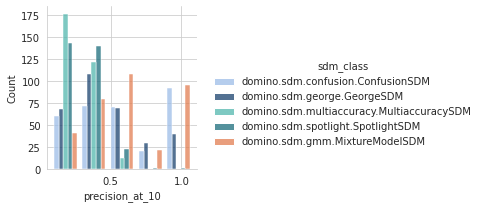

In [36]:
# model=real, comparison=method, data=natural 

from domino.plot import sdm_displot

out = sdm_displot(
    score_sdm_ids=score_sdm_,
    emb_groups=["clip"],

    sdm_classes=[
        "domino.sdm.gmm.MixtureModelSDM",
        "domino.sdm.george.GeorgeSDM",
        "domino.sdm.multiaccuracy.MultiaccuracySDM",
        "domino.sdm.spotlight.SpotlightSDM",
        "domino.sdm.confusion.ConfusionSDM",
    ],
    skip_terra_cache=True,
    hue="sdm_class"
)


# `model=synthetic, comparison=embed, data=natural`

In [38]:
terra.inp(82222)["setting_dp"]
df = terra.out(81039).load().to_pandas()
df.groupby("slice_category")["setting_id"].nunique()

slice_category
rare    394
Name: setting_id, dtype: int64

task: sdm_barplot, run_id=141268
slice_category
correlation    520
noisy_label     95
rare           197
Name: setting_id, dtype: int64
slice_category
correlation    4
noisy_label    1
rare           1
Name: alpha, dtype: int64


<Figure size 432x288 with 0 Axes>

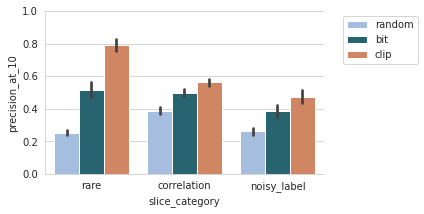

In [49]:
from domino.plot import sdm_barplot
sdm_barplot(
    score_sdm_ids=[82222, 77006, 87801, 89044],
    emb_groups=["bit", "clip", "random"],
    sdm_classes=["domino.sdm.gmm.MixtureModelSDM"],
    skip_terra_cache=True
)

task: sdm_displot, run_id=138875


<Figure size 432x288 with 0 Axes>

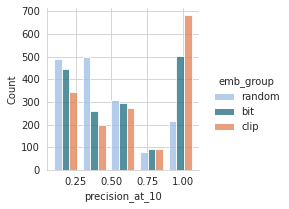

In [27]:
from domino.plot import sdm_displot
sdm_displot(
    score_sdm_ids=[82222, 77006, 87801, 89044],
    emb_groups=["bit", "clip", "random"],
    sdm_classes=["domino.sdm.gmm.MixtureModelSDM"],
)

# `model=synthetic_comparison=method_data=mimic
`

task: sdm_barplot, run_id=158177
slice_category
correlation    176
noisy_label     55
rare            55
Name: setting_id, dtype: int64
slice_category
correlation    4
noisy_label    5
rare           5
Name: alpha, dtype: int64


<Figure size 432x288 with 0 Axes>

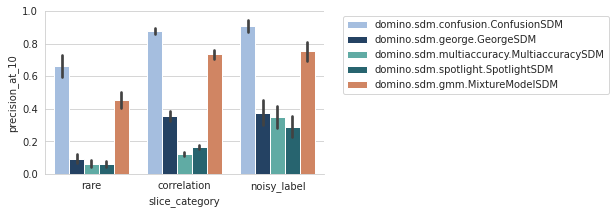

In [33]:
# model=synthetic_comparison=method_data=natural 
from domino.plot import sdm_barplot
score_sdm_ids=[152130, 119202, 117095]
out = sdm_barplot(
    score_sdm_ids=score_sdm_ids,
    emb_groups=["clip"],

    sdm_classes=[
        "domino.sdm.gmm.MixtureModelSDM",
        "domino.sdm.george.GeorgeSDM",
        "domino.sdm.multiaccuracy.MultiaccuracySDM",
        "domino.sdm.spotlight.SpotlightSDM",
        "domino.sdm.confusion.ConfusionSDM",
    ],
    skip_terra_cache=True,
    hue="sdm_class"
)


task: sdm_displot, run_id=158179
slice_category
correlation    176
noisy_label     55
rare            55
Name: setting_id, dtype: int64


<Figure size 432x288 with 0 Axes>

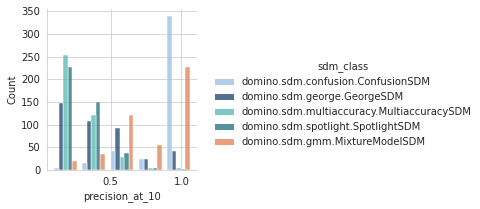

In [34]:
from domino.plot import sdm_displot

out = sdm_displot(
    score_sdm_ids=score_sdm_ids,
    emb_groups=["clip"], 
    sdm_classes=[
        "domino.sdm.gmm.MixtureModelSDM",
        "domino.sdm.george.GeorgeSDM",
        "domino.sdm.multiaccuracy.MultiaccuracySDM",
        "domino.sdm.spotlight.SpotlightSDM",
        "domino.sdm.confusion.ConfusionSDM",
    ],
    skip_terra_cache=True,
    hue="sdm_class"
)
